In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:03<00:00, 45.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.ToTensor(),
])

trainset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                  download=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=4,
                                                    shuffle=True, num_workers=2)

Files already downloaded and verified


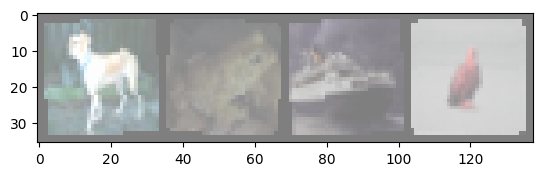

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader_augmented)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader_augmented, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0

print('Finished Training')

[1, 2000] loss: 2.256876224040985
[1, 4000] loss: 2.081816752433777
[1, 6000] loss: 1.9828439642190934
[1, 8000] loss: 1.9020386413633823
[1, 10000] loss: 1.8108712954819202
[1, 12000] loss: 1.7359464738219976
[2, 2000] loss: 1.6687004215121268
[2, 4000] loss: 1.6620041999965907
[2, 6000] loss: 1.6196157938688993
[2, 8000] loss: 1.60299491481483
[2, 10000] loss: 1.5525722579061985
[2, 12000] loss: 1.5515471486747265
Finished Training


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Filter function to select only two classes
def filter_by_class(batch):
    images, labels = batch
    mask = (labels == 0) | (labels == 2)  # Filter to keep only airplanes and birds
    return images[mask], labels[mask]

In [ ]:
# Transform for converting images to tensor
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Apply filter
trainset = torch.utils.data.Subset(trainset, [i for i in range(len(trainset)) if trainset.targets[i] in {0, 2}])
testset = torch.utils.data.Subset(testset, [i for i in range(len(testset)) if testset.targets[i] in {0, 2}])

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

print("Number of training samples:", len(trainset))
print("Number of testing samples:", len(testset))
print("Number of classes:", len({0, 2}))  # Only 2 classes

Number of training samples: 10000
Number of testing samples: 2000
Number of classes: 2


Files already downloaded and verified
Displaying images after applying horizontal_flip:


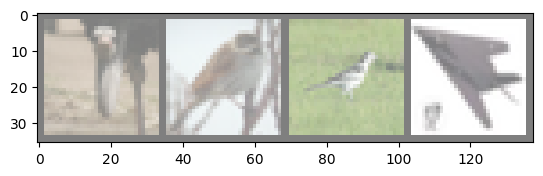

Files already downloaded and verified
Displaying images after applying vertical_flip:


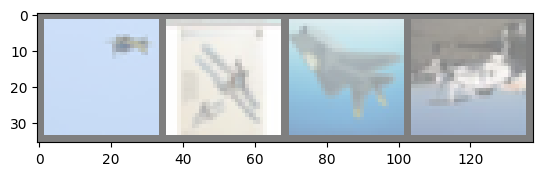

Files already downloaded and verified
Displaying images after applying rotation_45:


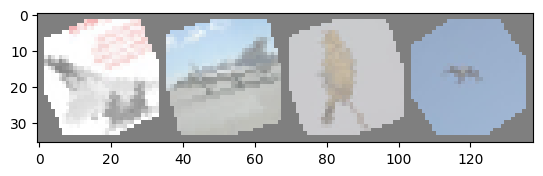

Files already downloaded and verified
Displaying images after applying rotation_90:


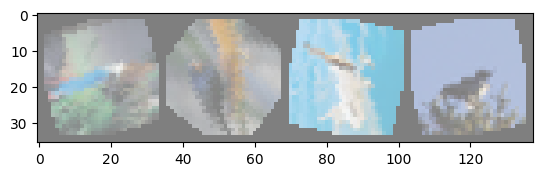

Files already downloaded and verified
Displaying images after applying color_jitter:


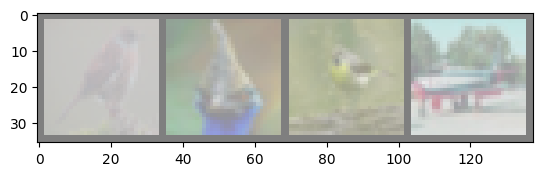

Files already downloaded and verified
Displaying images after applying grayscale:


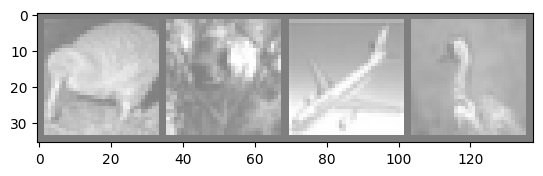

Files already downloaded and verified
Displaying images after applying random_crop:


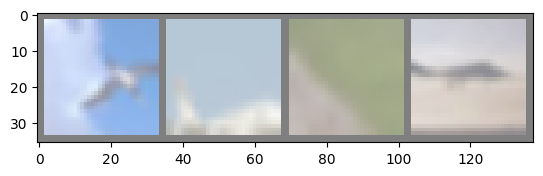

Files already downloaded and verified
Displaying images after applying random_perspective:


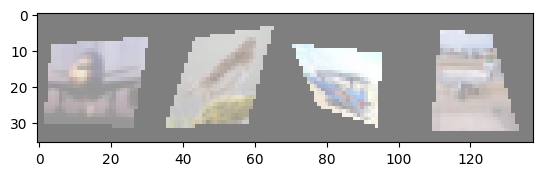

Files already downloaded and verified
Displaying images after applying random_affine:


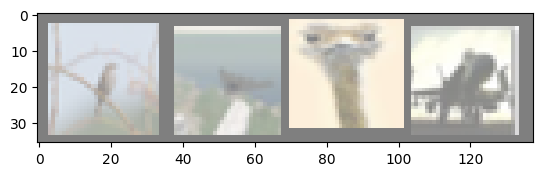

Files already downloaded and verified
Displaying images after applying random_erasing:


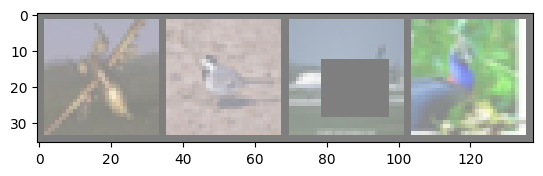

Files already downloaded and verified


Displaying images after applying normalize:


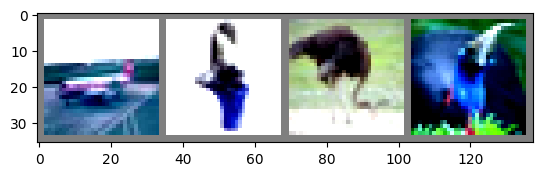

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a wide range of transformations
transformations = {
    'horizontal_flip': transforms.Compose([transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()]),
    'vertical_flip': transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.ToTensor()]),
    'rotation_45': transforms.Compose([transforms.RandomRotation(degrees=45), transforms.ToTensor()]),
    'rotation_90': transforms.Compose([transforms.RandomRotation(degrees=90), transforms.ToTensor()]),
    'color_jitter': transforms.Compose([transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1), transforms.ToTensor()]),
    'grayscale': transforms.Compose([transforms.Grayscale(num_output_channels=3), transforms.ToTensor()]),
    'random_crop': transforms.Compose([transforms.RandomResizedCrop(size=32), transforms.ToTensor()]),
    'random_perspective': transforms.Compose([transforms.RandomPerspective(distortion_scale=0.6, p=1), transforms.ToTensor()]),
    'random_affine': transforms.Compose([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), transforms.ToTensor()]),
    'random_erasing': transforms.Compose([transforms.ToTensor(), transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)]),
    'normalize': transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
}

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load the CIFAR-10 dataset with the above transformations
for name, trans in transformations.items():
    modified_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=trans)
    modified_trainset = torch.utils.data.Subset(modified_trainset, [i for i in range(len(modified_trainset)) if modified_trainset.targets[i] in {0, 2}])
    modified_loader = torch.utils.data.DataLoader(modified_trainset, batch_size=4, shuffle=True, num_workers=2)

    # Display a sample image after transformation
    dataiter = iter(modified_loader)
    images, labels = next(dataiter)
    print(f"Displaying images after applying {name}:")
    imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output for 10 classes, adjust if needed

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 2000}')
                running_loss = 0.0
    print('Finished Training')

def evaluate_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [ ]:
results = {}
for name, trans in transformations.items():
    print(f"Training with {name}")

    # Load and transform the CIFAR-10 dataset
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=trans)
    trainset = torch.utils.data.Subset(trainset, [i for i in range(len(trainset)) if trainset.targets[i] in {0, 2}])
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=trans)
    testset = torch.utils.data.Subset(testset, [i for i in range(len(testset)) if testset.targets[i] in {0, 2}])
    testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

    # Initialize the model, loss function, and optimizer
    net = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    # Train and evaluate the model
    train_model(net, trainloader, criterion, optimizer)
    accuracy = evaluate_model(net, testloader)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy}%")

Training with horizontal_flip
Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 2000, Loss: 0.7117789912000299
Epoch 2, Batch 2000, Loss: 0.4902505712751299
Epoch 3, Batch 2000, Loss: 0.40695333961211144
Epoch 4, Batch 2000, Loss: 0.3547216405617073
Epoch 5, Batch 2000, Loss: 0.3443150361923035
Epoch 6, Batch 2000, Loss: 0.3107687710793689
Epoch 7, Batch 2000, Loss: 0.2930882357963128
Epoch 8, Batch 2000, Loss: 0.28329549961327577
Epoch 9, Batch 2000, Loss: 0.268900549838203
Epoch 10, Batch 2000, Loss: 0.2517996252063895
Finished Training
Accuracy for horizontal_flip: 88.1%
Training with vertical_flip
Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 2000, Loss: 0.7335148765817284
Epoch 2, Batch 2000, Loss: 0.5163879050053656
Epoch 3, Batch 2000, Loss: 0.41272418535500766
Epoch 4, Batch 2000, Loss: 0.36600317939696836
Epoch 5, Batch 2000, Loss: 0.3387848172290251
Epoch 6, Batch 2000, Loss: 0.3199372276959

In [ ]:
results = {}
net = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train_model(net, trainloader, criterion, optimizer)
accuracy = evaluate_model(net, testloader)
results['no_transformation'] = accuracy
print(f"Accuracy with no transformation: {accuracy}%")

Epoch 1, Batch 2000, Loss: 0.6897277678698301
Epoch 2, Batch 2000, Loss: 0.489853292260319
Epoch 3, Batch 2000, Loss: 0.3974031860632822
Epoch 4, Batch 2000, Loss: 0.351499773565447
Epoch 5, Batch 2000, Loss: 0.32119359546073245
Epoch 6, Batch 2000, Loss: 0.3073234513241332
Epoch 7, Batch 2000, Loss: 0.28354493209789505
Epoch 8, Batch 2000, Loss: 0.27271224961662666
Epoch 9, Batch 2000, Loss: 0.25222905447741506
Epoch 10, Batch 2000, Loss: 0.24380217868858017
Finished Training
Accuracy with no transformation: 87.35%
